In [1]:
%run init.ipynb

### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

# Purificação de estados

## Decomposição de Schmidt
O estado puro de um sistema de 2 quantons A e B, com dimensões $d_{A}$ e $d_{B}$, respectivamente, pode ser escrito em termos de bases ortonormais locais como
$$|\Psi\rangle_{AB} = \sum_{j=0}^{d_{A}-1}\sum_{k=0}^{d_{B}-1}C_{j,k}|j\rangle_{A}\otimes|k\rangle_{B}.$$

O teorema da decomposição de Schmidt diz que podemos escrever estes estados em termos de bases ortonormais locais de forma que
$$|\Psi\rangle_{AB} = \sum_{j=0}^{\min(d_{A},d_{B})-1}\sqrt{\lambda_{j}}|\alpha_{j}\rangle_{A}\otimes|\beta_{j}\rangle_{B},$$
com $\lambda_{j}\in\mathbb{R}$. O operador densidade correspondente é
$$\rho_{AB} = |\Psi\rangle_{AB}\langle\Psi| = \sum_{j,k}\sqrt{\lambda_{j}\lambda_{k}}|\alpha_{j}\rangle_{A}\langle\alpha_{k}|\otimes|\beta_{j}\rangle_{B}\langle\beta_{k}|$$

Usando o traço parcial
$$Tr_{B}(|\alpha\rangle_{A}\langle\alpha'|\otimes|\beta\rangle_{B}\langle\beta'|)=|\alpha\rangle_{A}\langle\alpha'|\otimes_{B}\langle\beta'|\beta\rangle_{B},$$
é fácil verificar que
\begin{align}
& \rho_{A} = \sum_{j}\lambda_{j}|\alpha_{j}\rangle_{A}\langle\alpha_{j}|, \\
& \rho_{B} = \sum_{j}\lambda_{j}|\beta_{j}\rangle_{B}\langle\beta_{j}|.
\end{align}

## Purificação
Consideremos que queremos preparar um estado misto cuja decomposição espectral é
$$\rho_{A} = \sum_{j}\lambda_{j}|\alpha_{j}\rangle_{A}\langle\alpha_{j}|.$$
Por causa da decomposição de Schmidt, sabemos que é possível usar um sistema auxiliar B para purificar A de forma que 
$$\rho_{A}=Tr_{B}(|\Psi\rangle_{AB}\langle\Psi|)$$
com
$$|\Psi\rangle_{AB} = \sum_{j=0}^{d_{A}-1}\sqrt{\lambda_{j}}|\alpha_{j}\rangle_{A}\otimes|\beta_{j}\rangle_{B}.$$

OBS: Obtemos o mesmo $\rho_{A}$ se usarmos $|\Psi\rangle_{AB}$ ou $I\otimes U_{B}|\Psi\rangle_{AB}$ para $U_{B}U_{B}^{\dagger}=U_{B}^{\dagger}U_{B}=I$ sendo uma transformação unitária.

### 1 qubit
Um estado qualquer de um qubit pode ser escrito como
$$\rho_{A}=r_{+}|r_{+}\rangle\langle r_{+}| + r_{-}|r_{-}\rangle\langle r_{-}|,$$
com $\{r_{\pm}\}$ sendo uma distribuição de probabilidades, i.e., $r_{+}+r_{-}=1$, e
\begin{align}
& |r_{+}\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle, \\
& |r_{-}\rangle = \sin(\theta/2)|0\rangle - e^{i\phi}\cos(\theta/2)|1\rangle.
\end{align}

Usando um qubit auxiliar, é fácil verificar que o seguinte estado é uma purificação de $\rho_{A}$:
$$|\Psi\rangle_{AB} = \sqrt{r_{+}}|r_{+}\rangle\otimes|0\rangle + \sqrt{r_{-}}|r_{-}\rangle\otimes|1\rangle.$$
Ou seja, $\rho_{A}=Tr_{B}\big(|\Psi\rangle_{AB}\langle\Psi|\big).$

Para implementação experimental, lembremos que a porta $U_{3}(\theta,\phi,\lambda)$ atua como segue
\begin{align}
& U_{3}|0\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle, \\
& U_{3}|1\rangle = -e^{i\lambda}\sin(\theta/2)|0\rangle + e^{i(\phi+\lambda)}\cos(\theta/2)|1\rangle.
\end{align}
Temos assim que
\begin{align}
& U_{3}(\theta,\phi,\pi)|0\rangle = |r_{+}\rangle, \\
& U_{3}(\theta,\phi,\pi)|1\rangle = |r_{-}\rangle.
\end{align}

Pode-se verificar que o circuito quântico abaixo prepara a almejada purificação
<img src='fig_1qb_purification.png' width='300'>

Começamos no estado $|00\rangle$. Aplicando $U_{3}(\vartheta,0,0)$ no qubit 0, obtemos o estado
\begin{align}
|\Psi_{1}\rangle & = U_{3}(\vartheta,0,0)\otimes I|00\rangle = \big(\cos(\vartheta/2)|0\rangle + e^{i0}\sin(\vartheta/2)|1\rangle\big)\otimes|0\rangle \\
& = \cos(\vartheta/2)|00\rangle + \sin(\vartheta/2)|10\rangle.
\end{align}
Aplicando a não controlada, teremos (para obter autovalores corretos)
\begin{align}
|\Psi_{2}\rangle & = CNOT_{0\rightarrow 1}|\Psi_{1}\rangle \\
& = \cos(\vartheta/2)|00\rangle + \sin(\vartheta/2)|11\rangle.
\end{align}
Por fim, aplicamos $U_{3}(\theta,\phi,\pi)$ (para obter os autovetores corretos):
\begin{align}
|\Psi_{3}\rangle & = U_{3}(\theta,\phi,\pi)\otimes I|\Psi_{2}\rangle \\
& = \cos(\vartheta/2)|r_{+}\rangle\otimes|0\rangle + \sin(\vartheta/2)|r_{-}\rangle\otimes|1\rangle.
\end{align}
Teremos assim a purificação 
$$|\Psi\rangle_{AB} = \sqrt{r_{+}}|r_{+}\rangle\otimes|0\rangle + \sqrt{r_{-}}|r_{-}\rangle\otimes|1\rangle$$ 
com
$$r_{+} = \cos^{2}(\vartheta/2) \text{ e } r_{-} = \sin^{2}(\vartheta/2)$$
e
$$r_{+}\in[0,1]\ \therefore\ \vartheta\in[\pi,0].$$

In [2]:
rp = np.arange(0,1.1,0.1); vth = 2*np.arccos(np.sqrt(rp)); rp, vth

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([3.14159265, 2.49809154, 2.21429744, 1.98231317, 1.77215425,
        1.57079633, 1.36943841, 1.15927948, 0.92729522, 0.64350111,
        0.        ]))

#### Alguns cálculos analíticos, para verificação

In [3]:
def ket_rp(th,phi):
    return Matrix([[cos(th/2)],[(cos(ph)+1j*sin(ph))*sin(th/2)]])
def ket_rm(th,phi):
    return Matrix([[sin(th/2)],[-(cos(ph)+1j*sin(ph))*cos(th/2)]])

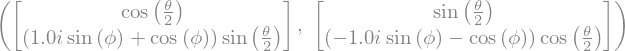

In [4]:
rp,th,ph = symbols('r_{+} theta phi', Real=True); ket_rp(th,ph), ket_rm(th,ph)

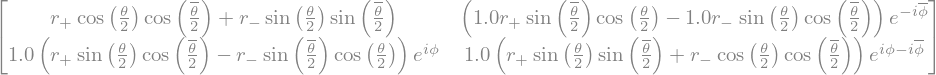

In [5]:
def rho(rp,rm,th,ph):
    return rp*proj(ket_rp(th,ph)) + rm*proj(ket_rm(th,ph))
rp,rm,th,ph = symbols('r_{+} r_{-} theta phi', Real=True); simplify(rho(rp,rm,th,ph))

#### Parâmetros (que determinam o estado) para as simulações e experimentos

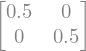

In [6]:
rp = 1/2; vth = 2*math.acos(sqrt(rp)); th = 0*math.pi/4; ph = 0*math.pi/3
simplify(rho(rp,1-rp,th,ph))

In [7]:
print(rp, vth, th, ph)

0.5 1.5707963267948966 0.0 0.0


#### Comandos gerais para a simulação e experimentos

In [9]:
import qiskit
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
simulator = provider.get_backend('ibmq_qasm_simulator')
device = provider.get_backend('ibmq_belem')
nshots = 8192
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.tools.monitor import job_monitor

ibmqfactory.load_account:WARNING:2021-11-16 12:33:53,219: Credentials are already in use. The existing account in the session will be replaced.


In [10]:
def pTraceL_num(dl, dr, rhoLR):
    # Returns the left partial trace over the 'left' subsystem of rhoLR
    rhoR = np.zeros((dr, dr), dtype=complex)
    for j in range(0, dr):
        for k in range(j, dr):
            for l in range(0, dl):
                rhoR[j,k] += rhoLR[l*dr+j,l*dr+k]
            if j != k:
                rhoR[k,j] = np.conj(rhoR[j,k])
    return rhoR

#### Simulação

In [11]:
qr = qiskit.QuantumRegister(2); qc = qiskit.QuantumCircuit(qr)
qc.u(vth,0,0,qr[0]); qc.cx(qr[0],qr[1]); qc.u(th,ph,math.pi,qr[0]);
qc.draw()

┌────────────┐     ┌──────────┐
q0_0: ┤ U(π/2,0,0) ├──■──┤ U(0,0,π) ├
      └────────────┘┌─┴─┐└──────────┘
q0_1: ──────────────┤ X ├────────────
                    └───┘

In [13]:
qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
job = qiskit.execute(qstc, backend = simulator, shots = nshots) # executa no simulador
qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
rhoBA = qstf.fit(method='lstsq'); rhoA = pTraceL_num(2, 2, rhoBA); rhoA

array([[ 0.49956788+0.j        , -0.00058932-0.00076271j],
       [-0.00058932+0.00076271j,  0.50043212+0.j        ]])

#### Experimento

In [14]:
qc.draw()

┌────────────┐     ┌──────────┐
q0_0: ┤ U(π/2,0,0) ├──■──┤ U(0,0,π) ├
      └────────────┘┌─┴─┐└──────────┘
q0_1: ──────────────┤ X ├────────────
                    └───┘

In [15]:
job = qiskit.execute(qstc, backend = device, shots = nshots)
print(job.job_id()); job_monitor(job)

6193cfa4a90bff27a726153f
Job Status: job has successfully run


In [17]:
qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
rhoBA = qstf.fit(method='lstsq'); # extrai o operador densidade
rhoA = pTraceL_num(2, 2, rhoBA); rhoA

array([[0.51200221+0.j        , 0.0052438 -0.03583184j],
       [0.0052438 +0.03583184j, 0.48799779+0.j        ]])

#### Exercício
Testar a funcionalidade do algoritmo acima, para purificação de estados de 1 qubit, para 2 estados mistos de sua escolha.

### 2 qubits
Fornecer algoritmos que preparem um estado misto qualquer, de 2 qubits, através de purificações é bem mais complicado que no caso de 1 qubit. Na verdade, em (https://arxiv.org/abs/1808.10533) fornecemos um algoritmo para preparar __estados Bell-diagonal__
$$\rho_{AB}^{BD} = p_{1}|\Phi_{+}\rangle\langle\Phi_{+}| + p_{2}|\Phi_{-}\rangle\langle\Phi_{-}| + p_{3}|\Psi_{-}\rangle\langle\Psi_{-}| + p_{4}|\Psi_{+}\rangle\langle\Psi_{+}|,$$
em que
$$|\Phi_{\pm}\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle\pm|11\rangle\big) \text{, } |\Psi_{\pm}\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle\pm|10\rangle\big)$$
são a base de Bell e $\{p_{j}\}$ é uma distribuição de probabilidade. Esse algoritmo foi melhorado em (https://www.mdpi.com/1160790). Recentemente, foi reportado um algoritmo para preparar __estados do tipo X__ (https://arxiv.org/abs/2105.14581), que são mais gerais que estados Bell-diagonal.

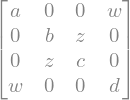

In [18]:
a,b,c,d = symbols('a,b,c,d', Real=True, Positive=True);
z,w = symbols('z,w', Real=True)
rhoX = Matrix([[a,0,0,w],[0,b,z,0],[0,z,c,0],[w,0,0,d]]); rhoX

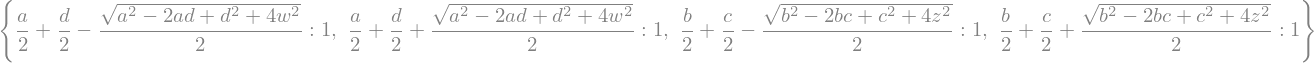

In [39]:
rhoX.eigenvals()

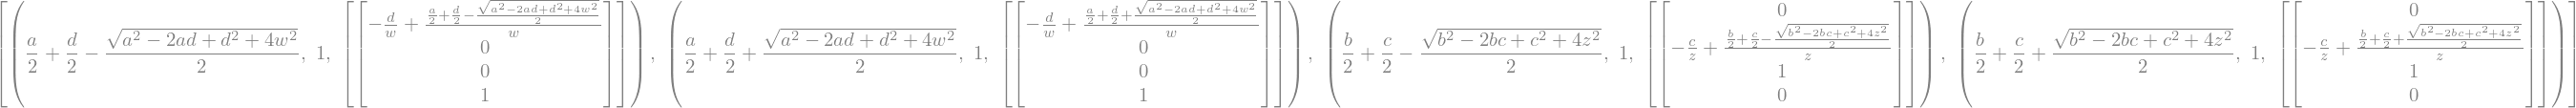

In [22]:
rhoX.eigenvects()

Desses resultados, vemos que devemos ter
$$w^{2}\le ad \text{ e } z^{2}\le bc.$$

Segundo os autores, estados do tipo X reais podem ser escritos como
$$\rho_{X}=\begin{bmatrix}a&0&0&w \\ 0&b&z&0 \\ 0&z&c&0 \\ w&0&0&d\end{bmatrix} = \sum_{j,k=0}^{1}p_{jk}|\psi_{jk}\rangle\langle\psi_{jk}|,$$
com
\begin{align}
& |\psi_{00}\rangle = \cos(\theta)|00\rangle + \sin(\theta)|11\rangle, \\
& |\psi_{10}\rangle = -\sin(\theta)|00\rangle + \cos(\theta)|11\rangle, \\
& |\psi_{01}\rangle = \sin(\phi)|01\rangle + \cos(\phi)|10\rangle, \\
& |\psi_{11}\rangle = \cos(\phi)|01\rangle - \sin(\phi)|10\rangle.
\end{align}

Segundo os autores, estados do tipo X podem ser preparados usando o circuito quântico da figura abaixo
<img src='fig_rhox_qc.png' width='450'>

A rotação 
$$R_{y}(\theta)=e^{-i\theta Y/2} = \cos(\theta)I-i\sin(\theta)Y = \begin{bmatrix}\cos(\theta)&-\sin(\theta)\\\sin(\theta)&\cos(\theta)\end{bmatrix}$$
atua na base computacional como segue
\begin{align}
& R_{y}(\theta)|0\rangle = \cos(\theta)|0\rangle + \sin(\theta)|1\rangle, \\
& R_{y}(\theta)|1\rangle = -\sin(\theta)|0\rangle + \cos(\theta)|1\rangle.
\end{align}

__Autovalores__ <br>
Do primeiro bloco, teremos que
\begin{align}
& |0000\rangle \ \underrightarrow{R_{y}(\alpha)}\ \big(\cos(\alpha)|0\rangle+\sin(\alpha)|1\rangle\big)|000\rangle  \\
& \underrightarrow{CNOT_{0\rightarrow 1}}\ \big(\cos(\alpha)|00\rangle+\sin(\alpha)|11\rangle\big)|00\rangle \\
& \underrightarrow{R_{y}(\beta)\otimes R_{y}(\gamma)}\ \Big(\cos(\alpha)\big(\cos(\beta)|0\rangle+\sin(\beta)|1\rangle\big)\big(\cos(\gamma)|0\rangle+\sin(\gamma)|1\rangle\big)+\sin(\alpha)\big(-\sin(\beta)|0\rangle + \cos(\beta)|1\rangle\big)\big(-\sin(\gamma)|0\rangle + \cos(\gamma)|1\rangle\big)\Big)|00\rangle \\
& \hspace{2.8cm} = \big(\cos(\alpha)\cos(\beta)\cos(\gamma)+\sin(\alpha)\sin(\beta)\sin(\gamma)\big)|0000\rangle + \big(\cos(\alpha)\cos(\beta)\sin(\gamma)-\sin(\alpha)\sin(\beta)\cos(\gamma)\big)|0100\rangle \\
& \hspace{3.2cm} + \big(\cos(\alpha)\sin(\beta)\cos(\gamma)-\sin(\alpha)\cos(\beta)\sin(\gamma)\big)|1000\rangle  + \big(\cos(\alpha)\sin(\beta)\sin(\gamma)+\sin(\alpha)\cos(\beta)\cos(\gamma)\big)|1100\rangle \\
& \underrightarrow{CNOT_{0\rightarrow 2}\otimes CNOT_{1\rightarrow 3}} = \big(\cos(\alpha)\cos(\beta)\cos(\gamma)+\sin(\alpha)\sin(\beta)\sin(\gamma)\big)|0000\rangle + \big(\cos(\alpha)\cos(\beta)\sin(\gamma)-\sin(\alpha)\sin(\beta)\cos(\gamma)\big)|0101\rangle \\
& \hspace{5cm} + \big(\cos(\alpha)\sin(\beta)\cos(\gamma)-\sin(\alpha)\cos(\beta)\sin(\gamma)\big)|1010\rangle  + \big(\cos(\alpha)\sin(\beta)\sin(\gamma)+\sin(\alpha)\cos(\beta)\cos(\gamma)\big)|1111\rangle.
\end{align}

Tomando o traço parcial sobre os qubits 0 e 1 obteremos
\begin{align}
\rho_{23} & = \big(\cos(\alpha)\cos(\beta)\cos(\gamma)+\sin(\alpha)\sin(\beta)\sin(\gamma)\big)^{2}|00\rangle\langle 00| + \big(\cos(\alpha)\cos(\beta)\sin(\gamma)-\sin(\alpha)\sin(\beta)\cos(\gamma)\big)^{2}|01\rangle\langle 01| \\
& + \big(\cos(\alpha)\sin(\beta)\cos(\gamma)-\sin(\alpha)\cos(\beta)\sin(\gamma)\big)^{2}|10\rangle\langle 10| + \big(\cos(\alpha)\sin(\beta)\sin(\gamma)+\sin(\alpha)\cos(\beta)\cos(\gamma)\big)^{2}|11\rangle\langle 11|
\end{align}

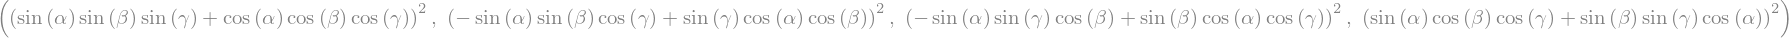

In [24]:
a,b,g = symbols('alpha beta gamma', Real = True, Positive = True)
p00 = (cos(a)*cos(b)*cos(g) + sin(a)*sin(b)*sin(g))**2
p01 = (cos(a)*cos(b)*sin(g) - sin(a)*sin(b)*cos(g))**2
p10 = (cos(a)*sin(b)*cos(g) - sin(a)*cos(b)*sin(g))**2
p11 = (cos(a)*sin(b)*sin(g) + sin(a)*cos(b)*cos(g))**2
p00,p01,p10,p11

In [25]:
simplify(p00+p01+p10+p11) # ok

__Autovetores__ <br>
Vamos verificar que o último bloco leva da base computacional $\{|jk\rangle\}$ para a base $\{|\psi_{jk}\rangle\}$. Começamos com
\begin{align}
& |00\rangle \ \underrightarrow{R_{y}(\theta+\phi)}\ \big(\cos(\theta+\phi)|0\rangle + \sin(\theta+\phi)|1\rangle\big)|0\rangle \\
& \underrightarrow{CNOT_{1\rightarrow 0}}\ \big(\cos(\theta+\phi)|0\rangle + \sin(\theta+\phi)|1\rangle\big)|0\rangle \\
& \underrightarrow{R_{y}(\theta-\phi)}\ \Big(\cos(\theta+\phi)\big(\cos(\theta-\phi)|0\rangle + \sin(\theta-\phi)|1\rangle\big) + \sin(\theta+\phi)\big(-\sin(\theta-\phi)|0\rangle + \cos(\theta-\phi)|1\rangle\big)\Big)|0\rangle \\
& = \Big(\big(\cos(\theta+\phi)\cos(\theta-\phi) - \sin(\theta+\phi)\sin(\theta-\phi)\Big)|00\rangle + \Big(\big(\cos(\theta+\phi)\sin(\theta-\phi) + \sin(\theta+\phi)\cos(\theta-\phi)\Big)|10\rangle \\
& = \cos(\theta+\phi+\theta-\phi)|00\rangle + \sin(\theta+\phi+\theta-\phi)|10\rangle = \cos(2\theta)|00\rangle + \sin(2\theta)|10\rangle \\
& \underrightarrow{CNOT_{0\rightarrow 1}}\ \cos(2\theta)|00\rangle + \sin(2\theta)|11\rangle.
\end{align}

Analogamente
\begin{align}
& |01\rangle\ \underrightarrow{R_{y}(\theta+\phi)}\ \big(\cos(\theta+\phi)|0\rangle + \sin(\theta+\phi)|1\rangle\big)|1\rangle \\
& \underrightarrow{CNOT_{1\rightarrow 0}}\ \big(\cos(\theta+\phi)|1\rangle + \sin(\theta+\phi)|0\rangle\big)|1\rangle \\
& \underrightarrow{R_{y}(\theta-\phi)}\ \Big(\cos(\theta+\phi)\big(-\sin(\theta-\phi)|0\rangle + \cos(\theta-\phi)|1\rangle\big) + \sin(\theta+\phi)\big(\cos(\theta-\phi)|0\rangle + \sin(\theta-\phi)|1\rangle\big)\Big)|1\rangle \\
& = \Big(\big(-\cos(\theta+\phi)\sin(\theta-\phi) + \sin(\theta+\phi)\cos(\theta-\phi)\Big)|01\rangle + \Big(\big(\cos(\theta+\phi)\cos(\theta-\phi) + \sin(\theta+\phi)\sin(\theta-\phi)\Big)|11\rangle \\
& = \cos(\theta+\phi-\theta+\phi)|01\rangle + \sin(\theta+\phi-\theta+\phi)|10\rangle = \cos(2\phi)|01\rangle + \sin(2\phi)|11\rangle \\
& \underrightarrow{CNOT_{0\rightarrow 1}}\ \cos(2\phi)|01\rangle + \sin(2\phi)|10\rangle.
\end{align}

Seguindo
\begin{align}
& |10\rangle\ \underrightarrow{R_{y}(\theta+\phi)}\ \big(-\sin(\theta+\phi)|0\rangle + \cos(\theta+\phi)|1\rangle\big)|0\rangle \\
& \underrightarrow{CNOT_{1\rightarrow 0}}\ \big(-\sin(\theta+\phi)|0\rangle + \cos(\theta+\phi)|1\rangle\big)|0\rangle \\
& \underrightarrow{R_{y}(\theta-\phi)}\ \Big(-\sin(\theta+\phi)\big(\cos(\theta-\phi)|0\rangle + \sin(\theta-\phi)|1\rangle\big) + \cos(\theta+\phi)\big(-\sin(\theta-\phi)|0\rangle + \cos(\theta-\phi)|1\rangle\big)\Big)|0\rangle \\
& = \Big(\big(-\sin(\theta+\phi)\cos(\theta-\phi) - \cos(\theta+\phi)\sin(\theta-\phi)\Big)|00\rangle + \Big(\big(-\sin(\theta+\phi)\sin(\theta-\phi) + \cos(\theta+\phi)\cos(\theta-\phi)\Big)|10\rangle \\
& = -\sin(\theta+\phi+\theta-\phi)|00\rangle + \cos(\theta+\phi+\theta-\phi)|10\rangle = -\sin(2\theta)|00\rangle + \cos(2\theta)|10\rangle \\
& \underrightarrow{CNOT_{0\rightarrow 1}}\ -\sin(2\theta)|00\rangle + \cos(2\theta)|11\rangle.
\end{align}

Por fim
\begin{align}
& |11\rangle\ \underrightarrow{R_{y}(\theta+\phi)}\ \big(-\sin(\theta+\phi)|0\rangle + \cos(\theta+\phi)|1\rangle\big)|1\rangle \\
& \underrightarrow{CNOT_{1\rightarrow 0}}\ \big(-\sin(\theta+\phi)|1\rangle + \cos(\theta+\phi)|0\rangle\big)|1\rangle \\
& \underrightarrow{R_{y}(\theta-\phi)}\ \Big(-\sin(\theta+\phi)\big(-\sin(\theta-\phi)|0\rangle + \cos(\theta-\phi)|1\rangle\big) + \cos(\theta+\phi)\big(\cos(\theta-\phi)|0\rangle + \sin(\theta-\phi)|1\rangle\big)\Big)|1\rangle \\
& = \Big(\big(\sin(\theta+\phi)\sin(\theta-\phi) + \cos(\theta+\phi)\cos(\theta-\phi)\Big)|01\rangle + \Big(\big(-\sin(\theta+\phi)\cos(\theta-\phi) + \cos(\theta+\phi)\sin(\theta-\phi)\Big)|11\rangle \\
& = \cos(\theta+\phi-\theta+\phi)|01\rangle - \sin(\theta+\phi-\theta+\phi)|10\rangle = \cos(2\phi)|01\rangle - \sin(2\phi)|11\rangle \\
& \underrightarrow{CNOT_{0\rightarrow 1}}\ \cos(2\phi)|01\rangle - \sin(2\phi)|10\rangle.
\end{align}

Depois de aplicada esse segundo bloco de operações, obteremos o operador densidade reduzido
\begin{align}
\rho_{23} & = \big(\cos(\alpha)\cos(\beta)\cos(\gamma)+\sin(\alpha)\sin(\beta)\sin(\gamma)\big)^{2}|\psi_{00}\rangle\langle \psi_{00}| + \big(\cos(\alpha)\cos(\beta)\sin(\gamma)-\sin(\alpha)\sin(\beta)\cos(\gamma)\big)^{2}|\psi_{01}\rangle\langle \psi_{01}| \\
& + \big(\cos(\alpha)\sin(\beta)\cos(\gamma)-\sin(\alpha)\cos(\beta)\sin(\gamma)\big)^{2}|\psi_{10}\rangle\langle \psi_{10}| + \big(\cos(\alpha)\sin(\beta)\sin(\gamma)+\sin(\alpha)\cos(\beta)\cos(\gamma)\big)^{2}|\psi_{11}\rangle\langle \psi_{11}|.
\end{align}

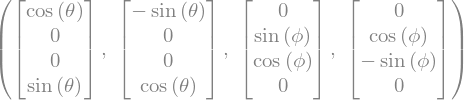

In [11]:
th,ph = symbols('theta phi', Real = True, Positive = True)
psi00 = cos(th)*tp(cb(2,0),cb(2,0)) + sin(th)*tp(cb(2,1),cb(2,1))
psi10 = -sin(th)*tp(cb(2,0),cb(2,0)) + cos(th)*tp(cb(2,1),cb(2,1))
psi01 = sin(ph)*tp(cb(2,0),cb(2,1)) + cos(ph)*tp(cb(2,1),cb(2,0))
psi11 = cos(ph)*tp(cb(2,0),cb(2,1)) - sin(ph)*tp(cb(2,1),cb(2,0))
psi00, psi10, psi01, psi11

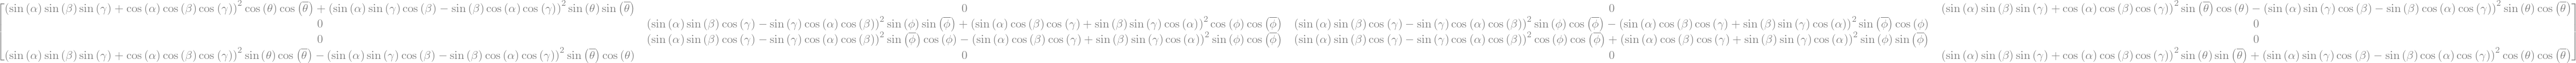

In [17]:
rho23 = p00*proj(psi00) + p01*proj(psi01) + p10*proj(psi10) + p11*proj(psi11);
simplify(rho23)

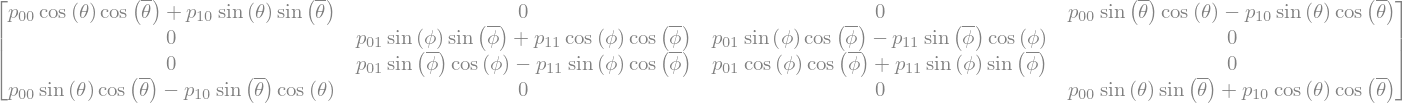

In [19]:
p00,p01,p10,p11 = symbols('p_{00},p_{01},p_{10},p_{11}')
rho23 = p00*proj(psi00) + p01*proj(psi01) + p10*proj(psi10) + p11*proj(psi11);
rho23

Vemos assim que
\begin{align}
& a = p_{00}\cos^{2}\theta + p_{10}\sin^{2}\theta, \\
& b = p_{01}\sin^{2}\phi + p_{11}\cos^{2}\phi, \\
& c = p_{01}\cos^{2}\phi + p_{11}\sin^{2}\phi, \\
& d = p_{00}\sin^{2}\theta + p_{10}\cos^{2}\theta, \\
& z = (p_{01}- p_{11})\sin\phi\cos\phi, \\
& w = (p_{00}- p_{10})\sin\theta\cos\theta.
\end{align}

In [29]:
nonlinsolve([((cos(a)*cos(b)*cos(g) + sin(a)*sin(b)*sin(g))**2)*cos(th)**2 + (cos(a)*sin(b)*cos(g) - sin(a)*cos(b)*sin(g))**2*sin(th)**2 - a, 
       ((cos(a)*cos(b)*sin(g) - sin(a)*sin(b)*cos(g))**2)*sin(ph)**2 + ((cos(a)*sin(b)*sin(g) + sin(a)*cos(b)*cos(g))**2)*cos(ph)**2 - b, 
       ((cos(a)*cos(b)*sin(g) - sin(a)*sin(b)*cos(g))**2)*cos(ph)**2 + ((cos(a)*sin(b)*sin(g) + sin(a)*cos(b)*cos(g))**2)*sin(ph)**2 - c, 
       ((cos(a)*cos(b)*cos(g) + sin(a)*sin(b)*sin(g))**2)*sin(ph)**2 + (cos(a)*sin(b)*cos(g) - sin(a)*cos(b)*sin(g))**2*cos(th)**2 - d, 
       ((cos(a)*cos(b)*sin(g) - sin(a)*sin(b)*cos(g))**2-(cos(a)*sin(b)*sin(g) + sin(a)*cos(b)*cos(g))**2)*sin(ph)*cos(ph) - z,
       ((cos(a)*cos(b)*cos(g) + sin(a)*sin(b)*sin(g))**2-(cos(a)*sin(b)*cos(g) - sin(a)*cos(b)*sin(g))**2)*sin(th)*cos(th) - w],
      [th,ph,a,b,g])

KeyboardInterrupt: 